# S2 RNA-Seq Sanity Check

Do a sanity check on the data that Justin sent to Yijie yesterday. Data consists of 600 RNA-Seq samples from the SRA that were labeled as S2 cell in some way, organized as Gene (row) x sample (col). 

Justin provided raw counts as well as counts from different normalizations. These normalization account for differences in total number of counts by column -- use the RPKM counts.

- Use pandas to calculate the by sample spearman correlation matrix.
- Visualize using seaborn clustermap (i.e., hierarchical clustering).
- Look for groupings of samples that behave strange and estimate the number of distinct groups you think there are.
- Then using the RPKM data run a classification pipeline (StandardScaler > PCA > Classifier) and see if you can ID samples that behave very differently. I would start with KMeans with different K (see chapter 11 of our book to see how to do silhouette plots).
- Do any samples from [1-2] and [3-4] look very different from the other samples. I call this the Seasame street test (https://www.youtube.com/watch?v=rsRjQDrDnY8).
- Take those sample IDs to the SRA and read the descriptions to see if anything is strange about those samples.

In [31]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [266]:
rpkm_cnts = pd.read_table('../output/rna_seq/2018-03-14_s2_rnaseq_rpkm_gene_counts.tsv')

In [267]:
rpkm_cnts.head()

,FBgn,ERX173561,ERX173562,ERX173563,ERX173564,ERX173565,ERX173566,ERX173567,ERX173568,ERX173569,...,SRX981411,SRX981412,SRX981413,SRX981414,SRX981415,SRX982548,SRX982550,SRX982551,SRX982552,SRX982553
0,FBgn0000003,15.227652,6.830630,4.693087,8.147429,18.059926,12.595510,4.389867,4.655700,11.780542,...,0.000000,0.000000,0.000000,0.000000,0.000000,1776.653552,1509.384039,457.664859,975.877551,1324.676476
1,FBgn0000008,1.122204,0.888325,1.085044,0.889520,1.043866,0.485348,0.913445,0.615086,1.007757,...,6.363668,5.845374,4.819883,4.641463,4.971601,2.162532,2.361674,3.868633,3.186857,3.632112
2,FBgn0000014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.060447,0.018749,0.022877,0.075344,0.023597,0.133176,0.487810,0.418536,1.132253,0.610955
3,FBgn0000015,0.000000,0.531311,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.049991,0.041161,0.000000,1.693203,1.026494,2.005071,3.298970,2.343797
4,FBgn0000017,229.138557,241.257169,132.084378,175.068905,216.399320,173.152070,174.193849,65.423395,230.448472,...,161.442737,149.857868,280.679180,262.623083,284.849848,375.822857,432.376621,303.266464,227.764451,241.800897


In [268]:
corr_matrix = rpkm_cnts.corr(method='spearman')

In [269]:
corr_matrix.head()

,ERX173561,ERX173562,ERX173563,ERX173564,ERX173565,ERX173566,ERX173567,ERX173568,ERX173569,ERX173570,...,SRX981411,SRX981412,SRX981413,SRX981414,SRX981415,SRX982548,SRX982550,SRX982551,SRX982552,SRX982553
ERX173561,1.000000,0.923758,0.926990,0.927408,0.891051,0.924602,0.937804,0.929673,0.949389,0.941771,...,0.877011,0.877336,0.875591,0.876291,0.874165,0.860916,0.850685,0.844276,0.834401,0.837886
ERX173562,0.923758,1.000000,0.926458,0.921505,0.899424,0.928901,0.929622,0.924437,0.928943,0.927222,...,0.859217,0.858126,0.855400,0.859017,0.855799,0.840053,0.830301,0.827096,0.820357,0.823341
ERX173563,0.926990,0.926458,1.000000,0.922763,0.912423,0.936322,0.938032,0.931043,0.934459,0.932684,...,0.855829,0.855865,0.852348,0.854184,0.852917,0.835576,0.824458,0.816497,0.808134,0.810620
ERX173564,0.927408,0.921505,0.922763,1.000000,0.890455,0.920885,0.926266,0.936422,0.930781,0.928350,...,0.853490,0.853522,0.853227,0.854467,0.851516,0.844388,0.834130,0.830742,0.822528,0.824382
ERX173565,0.891051,0.899424,0.912423,0.890455,1.000000,0.917186,0.905496,0.898154,0.897986,0.896931,...,0.826361,0.826124,0.823333,0.825023,0.824893,0.804453,0.794107,0.787227,0.780271,0.782442


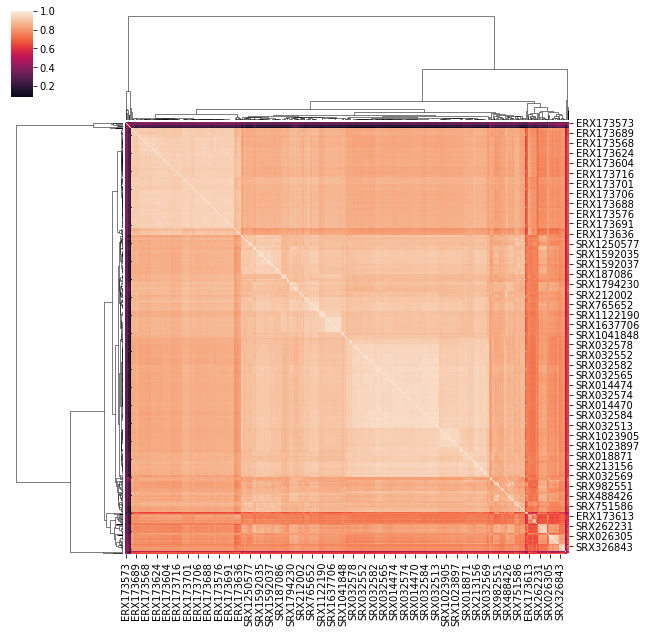

In [270]:
sb.clustermap(corr_matrix)

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [272]:
rpkm_cnts = rpkm_cnts.set_index('FBgn').T

In [273]:
X = rpkm_cnts.iloc[:, 0:].values

In [274]:
X_train, X_test = train_test_split(X, test_size=0.3, random_state=0)

In [275]:
#Standardize data
sc=StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [276]:
from sklearn.decomposition import PCA

In [277]:
pca= PCA()

In [278]:
X_train_pca = pca.fit_transform(X_train_std)

In [279]:
len(pca.explained_variance_ratio_[:20])

20

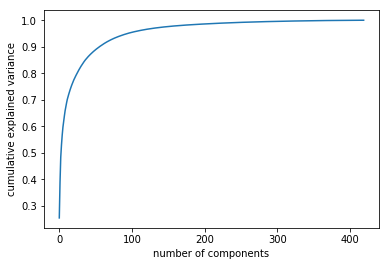

In [280]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

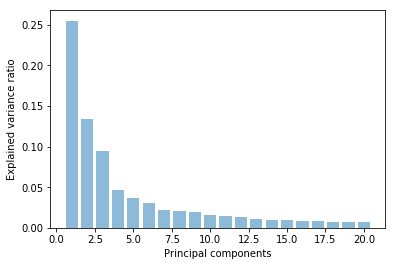

In [281]:
plt.bar(range(1,21), pca.explained_variance_ratio_[:20],alpha=0.5)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [282]:
#try 5 components

pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [283]:
from sklearn.cluster import KMeans

In [284]:
km = KMeans(n_clusters=10)

In [285]:
km.fit(X_train_pca)
y_kmeans = km.predict(X_test_pca)

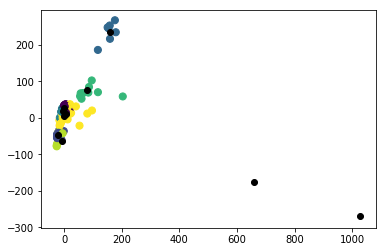

In [286]:
centers = km.cluster_centers_
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='black')

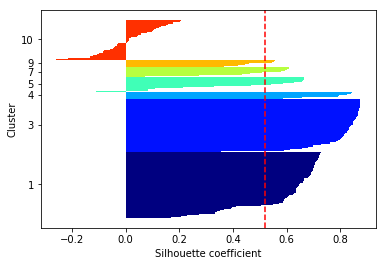

In [287]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_kmeans)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_test_pca, y_kmeans, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_kmeans == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In [288]:
#try diff num components
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [289]:
#try 5 clusters
km = KMeans(n_clusters=5)
km.fit(X_train_pca)
y_kmeans = km.predict(X_test_pca)

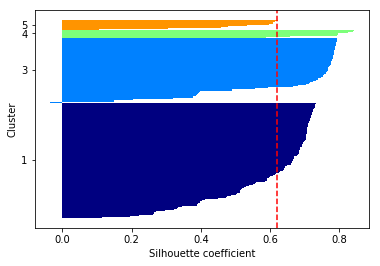

In [290]:
cluster_labels = np.unique(y_kmeans)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_test_pca, y_kmeans, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_kmeans == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

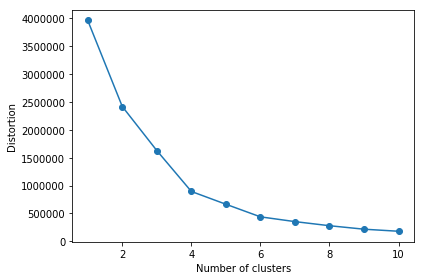

In [291]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X_train_pca)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

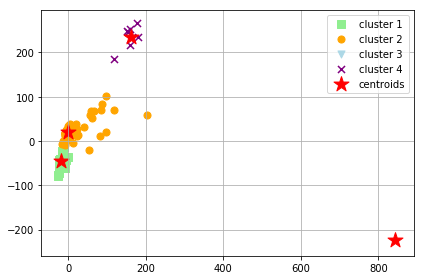

In [292]:
km = KMeans(n_clusters=4,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
km.fit(X_train_pca)
y_km = km.predict(X_test_pca)

plt.scatter(X_test_pca[y_km == 0, 0],
            X_test_pca[y_km == 0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1')
plt.scatter(X_test_pca[y_km == 1, 0],
            X_test_pca[y_km == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(X_test_pca[y_km == 2, 0],
            X_test_pca[y_km == 2, 1],
            s=50,
            c='lightblue',
            marker='v',
            label='cluster 3')
plt.scatter(X_test_pca[y_km == 3, 0],
            X_test_pca[y_km == 3, 1],
            s=50,
            c='purple',
            marker='x',
            label='cluster 4')


plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('./figures/centroids_bad.png', dpi=300)
plt.show()

In [294]:
X_test[y_km == 3].shape

(7, 17471)

In [296]:
y_km.shape

(180,)

In [303]:
# Apply model to entire dataset 
x_pca = pca.transform(X)
km_y2 = km.predict(x_pca)

In [309]:
rpkm_cnts['cluster'] = km_y2

Look into each cluster: 

In [321]:
#These are all "gro-seq" /nascent rna-seq 

rpkm_cnts[rpkm_cnts['cluster'] == 3].index.values

array(['SRX026303', 'SRX026304', 'SRX026305', 'SRX026306', 'SRX026307',
       'SRX026391', 'SRX026392', 'SRX026393', 'SRX100946', 'SRX100947',
       'SRX100948', 'SRX100949', 'SRX154693', 'SRX154694', 'SRX154695',
       'SRX154696', 'SRX1592045', 'SRX1592046', 'SRX1592047', 'SRX1592048',
       'SRX1592049', 'SRX1592050', 'SRX179272', 'SRX262231', 'SRX262232',
       'SRX262233', 'SRX262234', 'SRX326843', 'SRX326844', 'SRX326846',
       'SRX326847', 'SRX326848', 'SRX326849', 'SRX326850', 'SRX326851'], dtype=object)

In [317]:
rpkm_cnts[rpkm_cnts['cluster'] == 2].index.values


array(['SRX2031190', 'SRX2031191'], dtype=object)

In [318]:
rpkm_cnts[rpkm_cnts['cluster'] == 1].index.values

array(['ERX380418', 'ERX380427', 'ERX380429', 'ERX380430', 'SRX014458',
       'SRX014459', 'SRX014460', 'SRX014461', 'SRX014462', 'SRX014463',
       'SRX014464', 'SRX014465', 'SRX014466', 'SRX014467', 'SRX014468',
       'SRX014469', 'SRX014470', 'SRX014471', 'SRX014472', 'SRX014473',
       'SRX014474', 'SRX014475', 'SRX014476', 'SRX014477', 'SRX014478',
       'SRX014479', 'SRX014480', 'SRX014481', 'SRX014482', 'SRX014483',
       'SRX014484', 'SRX014485', 'SRX014486', 'SRX014487', 'SRX014488',
       'SRX014489', 'SRX014490', 'SRX014491', 'SRX014492', 'SRX016201',
       'SRX016202', 'SRX016203', 'SRX016204', 'SRX016205', 'SRX016206',
       'SRX017853', 'SRX018870', 'SRX018871', 'SRX018872', 'SRX018873',
       'SRX018874', 'SRX018875', 'SRX018876', 'SRX019234', 'SRX019235',
       'SRX019236', 'SRX027836', 'SRX032506', 'SRX032507', 'SRX032508',
       'SRX032509', 'SRX032510', 'SRX032511', 'SRX032512', 'SRX032513',
       'SRX032514', 'SRX032515', 'SRX032516', 'SRX032517', 'SRX0

In [319]:
rpkm_cnts[rpkm_cnts['cluster'] == 0].index.values

array(['ERX173561', 'ERX173562', 'ERX173563', 'ERX173564', 'ERX173565',
       'ERX173566', 'ERX173567', 'ERX173568', 'ERX173569', 'ERX173570',
       'ERX173571', 'ERX173572', 'ERX173573', 'ERX173574', 'ERX173575',
       'ERX173576', 'ERX173577', 'ERX173578', 'ERX173579', 'ERX173580',
       'ERX173581', 'ERX173582', 'ERX173583', 'ERX173584', 'ERX173585',
       'ERX173586', 'ERX173587', 'ERX173588', 'ERX173589', 'ERX173590',
       'ERX173591', 'ERX173592', 'ERX173593', 'ERX173594', 'ERX173595',
       'ERX173596', 'ERX173597', 'ERX173598', 'ERX173599', 'ERX173600',
       'ERX173601', 'ERX173602', 'ERX173603', 'ERX173604', 'ERX173605',
       'ERX173606', 'ERX173607', 'ERX173608', 'ERX173609', 'ERX173610',
       'ERX173611', 'ERX173612', 'ERX173613', 'ERX173614', 'ERX173615',
       'ERX173616', 'ERX173617', 'ERX173618', 'ERX173619', 'ERX173620',
       'ERX173621', 'ERX173622', 'ERX173623', 'ERX173624', 'ERX173625',
       'ERX173626', 'ERX173627', 'ERX173628', 'ERX173629', 'ERX1

In [326]:
#Save ids for the groseq samples in case we want to exclude these
groseq = pd.DataFrame(rpkm_cnts[rpkm_cnts['cluster'] == 3].index.values).to_csv('../output/rna_seq/groseq_samples',
                                                                               header=None, index=False, sep='\t')